## Proton Energy Loss Coulomb, and Ionization

Energy loss calculations for $n_{H} = n_{H_{II}} = 0.01\, \text{cm}^{-3}$, with photon and magnetic field densities set to $U = U_{B} = 1\, eV\, \text{cm}^{-3}$ over a different timescales are shown in [Strong and Moskalenko (1998)](https://iopscience.iop.org/article/10.1086/306470).  ![energyloss](proton_electron_loss_Strong.png)

### Use the Analytical Formulation as Described in the Paper and in the source code *energylosses.cc*

**Coulomb Loss:**

Coulomb loss in ionized plasma are dominated by scattering off the thermal electrons. 
$\left(\frac{dE}{dt}\right)_{coul} \approx -4\pi r_e^2 c m_e c^2 Z^2 n_e\, \text{ln}\, \Lambda \, \frac{\beta ^2}{x_m^3 + \beta ^3}$, <br>
where $r_e$ is the electron radius, $m_e$ is the electron mass, $n_e$ is the electron number density in plasma, $x_m \equiv [3 (\pi)^{0.5} /4 ]^{\frac{1}{3}} \left(2kT_e/m_ec^2\right)^{\frac{1}{2}}$. Coulomb logarithm in cold plasma is given by $\text{ln}\, \Lambda \approx \frac{1}{2} \text{ln} \left(\frac{m_e^2 c^4}{\pi r_e \left(\frac{h}{2\pi}\right)^2 c^2 n_e} \, \frac{M\gamma ^2 \beta ^4}{M + 2\gamma m_e} \right)$, where $M$ is the projectile mass, $\gamma$ is the Lorentz factor. Typical value of the Coulomb logarithm in $\text{ln}\, \Lambda$ lies within the interval $\sim 40-50$, instead of usually adopted value of 20.  <br>

**Ionization Loss:** <br>

$\left(\frac{dE}{dt}\right)_{ion}\left(\beta > \beta _0\right) = - 2\pi r_e^2 cm_ec^2 Z^2 \frac{1}{\beta} \sum \limits_{s=H, He} n_s\left[B_s + B' \left(\alpha _f Z/\beta \right)\right]$, <br>
where $\alpha _f$ is the fine structure constant, $n_s$ is the number density of the corresponding species in the ISM, $\beta _0 = 1.4 \frac{e^2}{\frac{h}{2\pi}c} = 0.01$ is the characteristic velocity determined by the orbital velocity of the electrons in the hydrogen and, <br>
$B_s = \left[\text{ln}\, \left(\frac{2m_e c^2 \beta ^2 \gamma ^2 Q_{max}}{\widetilde{I_s}^2} \right) - 2\beta ^2 - 2\frac{C_s}{z_s} - \delta _s\right]$, <br>
where $\gamma$ is the Lorentz factor of the ion. The largest possible energy transfer from the incident particle to the atomic electron is defined by kinematics, <br>
    $Q_{max} \approx \frac{2m_e c^2 \beta ^2 \gamma ^2}{1+\frac{2\gamma m_e}{M}}$, where $M>>m_e$ is the nucleon mass and $\widetilde {I_s}$ denotes the geometric mean of all ionization and exciting potentials of the atom. Schlickeiser suggested $\widetilde{I_H} = 19$ eV and $\widetilde{I_{He}} = 44$ eV. 
    
    
**Ionization Loss (Defined in Longair High Energy Astrophysics Book)** <br>

High energy particles going through a medium (solid, liquid or gas) can cause heavy wreckage to the constituent atoms, molecules and nuclei. In the process of ionization electrons are torn off atoms by the electrostatic forces between the charged high energy particle and the electrons. This is not only a source of ionization but it also causes heating in the medium due to transfer of kinetic energy to the electrons. 

_Non-Relativistic Case $(v\leq 0.01 c)$:_ Loss rate per unit length is given by <br>

$-\frac{dE}{dx} = \frac{z^2e^4N_e}{4\pi {\epsilon _0}^2 v^2 m_e}\, \text{ln}\, \left(\frac{2\pi m_e v^2}{(h/2\pi)\omega _0}\right)$, angular frequency $\omega _0$ can be expressed in terms of the binding energy of the electron.  <br>

_Relativistic Case:_ Practical Formula defined in Section 5.4 <br>
If the atomic number is Z and the number density of atoms is $N$ i.e. $N_e = ZN$, then ionization loss is given by-- <br>
$-\frac{dE}{dx} = \frac{z^2e^4NZ}{4\pi {\epsilon _0}^2 m_e v^2}\, \left[\text{ln}\left(\frac{2\gamma ^2 m_e v^2}{\overline{I}}\right) - \frac{v^2}{c^2}\right] $




In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [28]:
## Ionization Loss

rele = 2.8179409238e-13 #cm, electron radius in centimeter
Mele = 0.5109990615 # MeV/c^2, rest mass of electrons 
amu  = 0.931494 #GeV
MA = 1000.*amu #MeV
Pi = math.pi
C  = 2.99792458e10 # cm/s
H2PiC = 0.19732705359e-10 # MeV*cm, =hc/(2Pi) conversion const.
EH = 19.e-6                # MeV, H  eff. ioniz. potential (in nucl. loss)
EHe= 44.e-6                # MeV, He eff. ioniz. potential (in nucl. loss)
PIR0H2C2  = Pi*rele*H2PiC*H2PiC           # MeV^2*cm^3
PIR02MC2C = Pi*rele*rele*C*(Mele*1.e6)    # eV*cm^3/s = Pi*e^4/mc


def gamma(En):
    return float(En/MA)

def beta(x):
    beta1 = 1./ ( gamma(x) *gamma(x) )
    beta3 = math.sqrt(1-beta1)
    return beta3

# BK = 1.38066e-23/1.60218e-13 # Boltzmann constant

he_to_h = 0.11 # hydrogen to helium ratio = 0.11, defined in galdef file, input parameter 
# nhcm3 in galprop is defined as sum of neutral hydrogen atom and molecular hydrogen density # 
nhcm3 = 500 # let's assume 
nhe_cm3 = he_to_h*nhcm3 #

ion_loss = []
Energy = []
z = 1

for i in range(3000, 8000):
    En = 10**(i*0.001) 
    v_c = beta(En)
    gamma_fac = gamma(En)
    qmax = 2.*Mele*(gamma(En)*gamma(En)-1.)/(1. +2.*gamma(En)*Mele/MA)
    bh   = math.log(2.*Mele*(gamma(En)*gamma(En)-1.)*qmax /(EH*EH))  -2.*beta(En)*beta(En)
    bhe  = math.log(2.*Mele*(gamma(En)*gamma(En)-1.)*qmax /(EHe*EHe))-2.*beta(En)*beta(En)
    aion= ( (2.*PIR02MC2C*z*z)/(beta(En)) )*(nhcm3*bh + nhe_cm3*bhe)
    ion_loss.append(aion)
    Energy.append(En)

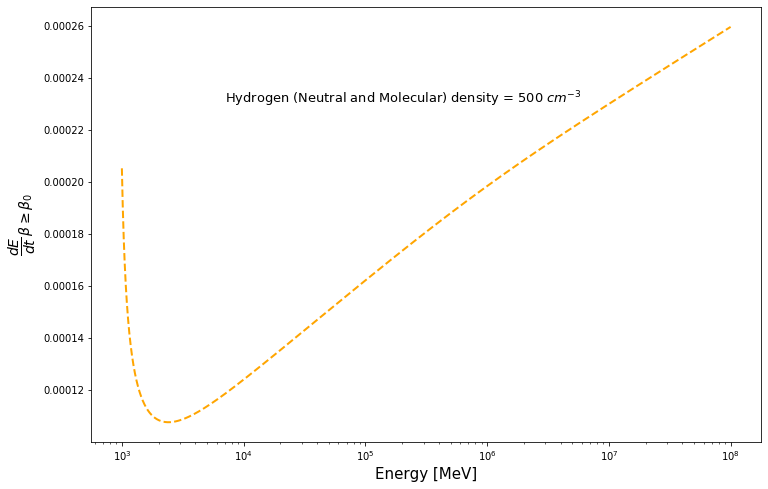

In [34]:
fig = plt.figure(figsize=(12, 8))

plt.xscale('log')
plt.xlabel('Energy [MeV]', fontsize=15)
plt.ylabel(r'$\frac{dE}{dt}_{\beta \geq \beta _0}$', fontsize=20)

plt.plot(Energy, ion_loss, linestyle='--', linewidth=2, color='orange', label='Ionization Energy Loss')
plt.text(7e3, 0.00023, r'Hydrogen (Neutral and Molecular) density = 500 $cm^{-3}$', fontsize=13)
plt.savefig("Ionization_loss_Galprop.png", dpi=200)
plt.show()

In [26]:
## Coulomb Loss

BK = 1.38066e-23/1.60218e-13 # Boltzmann constant

#nhicm3 ionized hydrogen density 
nhicm3 = 500 # cm^-3
Te = 1.0e4 # Kelvin

## Coulomb energy losses in the cold H plasma limit
C_En = []
coulloss = []

for i in range(3000, 8000):
    Ene = 10**(i*0.001)
    C_En.append(Ene)
    coullog = -math.log(4.*PIR0H2C2*nhicm3 *(MA+2.*gamma(Ene)*Mele)
      /(4.*gamma(Ene)*gamma(Ene)*beta(Ene)*beta(Ene)*beta(Ene)*beta(Ene)*Mele*Mele*MA)) /2.
    bet_e = math.sqrt(2.*BK*Te/Mele)
    xm = math.pow(3.*math.sqrt(Pi)/4.,1./3.) *bet_e
    we = beta(Ene)*beta(Ene)*beta(Ene)/(xm*xm*xm + beta(Ene)*beta(Ene)*beta(Ene))
    coul = 4.*PIR02MC2C*z*z*nhicm3/beta(Ene) *coullog *we
    coulloss.append(coul)                        

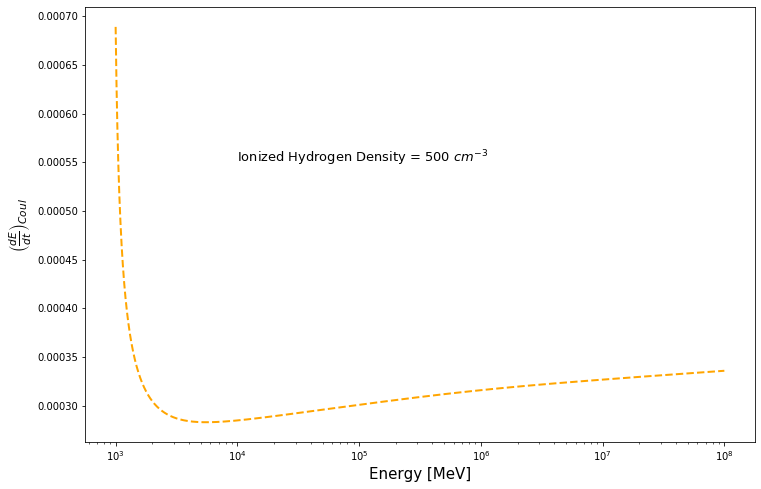

In [37]:
fig = plt.figure(figsize=(12, 8))

plt.xscale('log')
plt.ylabel(r'$\left(\frac{dE}{dt}\right)_{Coul}$', fontsize=15)
plt.xlabel('Energy [MeV]', fontsize=15)
plt.plot(C_En, coulloss, linestyle='--', linewidth=2, color='orange', label='Ionization Energy Loss')
plt.text(1e4, 0.00055, r'Ionized Hydrogen Density = 500 $cm^{-3}$', fontsize=13)
plt.savefig("Coulomb_loss_Galprop.png", dpi=200)
plt.show()